In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


We have a categorical variable as the prediction variable and there are other 11 features in the data given.

Here, the concept is for Health Insurance data, this dataset is about an Insurance company that has provided Health Insurance to its customers. Now we need build a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

In [4]:
test_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


We can observe the data tyes of different features.

In [6]:
train_data.shape

(381109, 12)

In [7]:
# checking for null values

train_data.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


It seems there are no null values in the dataset. So, there are no nulls to handle now.

Let us explore exploratory data analysis. Here, Gender, Driving License, Previosly Insured, Vehicle Age, Vehicle Damage and response variable are categorical variables while the rest are numerical variables.

Here, the id column is not a required one for predicting, so we can directly remove the column.

In [10]:
train_data.drop(["id"],axis=1, inplace=True)

Checking for response variable.

In [11]:
train_data["Response"].value_counts()

,count
Response,
0,334399
1,46710


There is a clear imbalance in the response variable, need to take care of imbalance in the dataset.

<Axes: xlabel='Response', ylabel='count'>

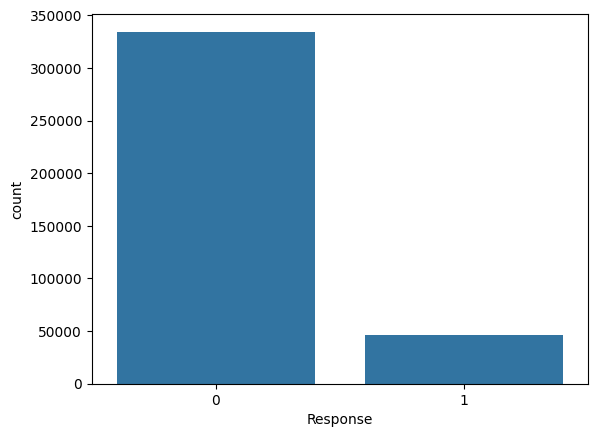

In [12]:
sns.countplot(data=train_data, x="Response")

In [13]:
train_data.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [14]:
train_data["Gender"].value_counts()

,count
Gender,
Male,206089
Female,175020


<Axes: xlabel='Gender', ylabel='count'>

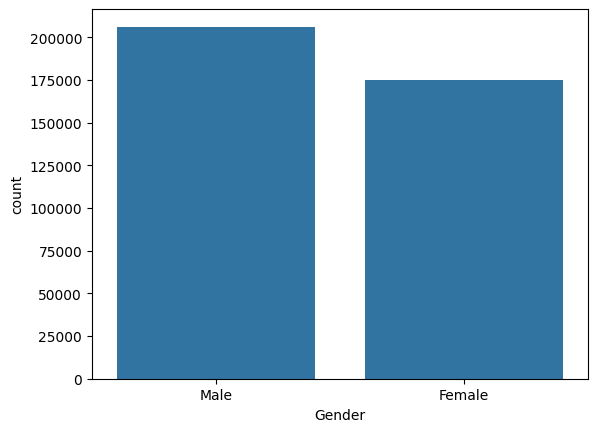

In [15]:
sns.countplot(data=train_data, x="Gender")

There is little difference in counts of male and female but we are good to proceed.


<Axes: xlabel='Age', ylabel='Count'>

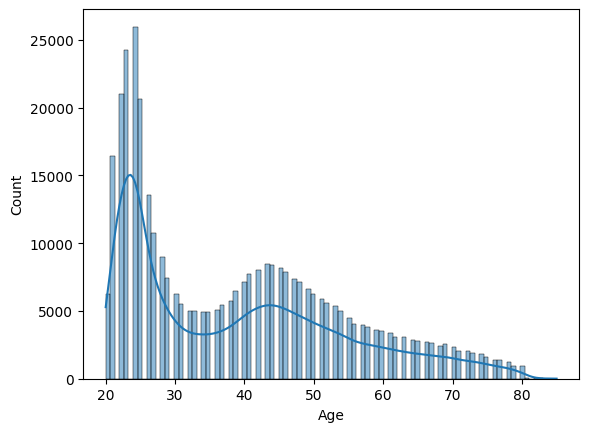

In [16]:
sns.histplot(train_data["Age"], kde=True)

The Age column can be called as skewed as there are lot of people in the age between 20 and 30.

In [17]:
train_data["Driving_License"].value_counts()

,count
Driving_License,
1,380297
0,812


There is a clear imbalance between the class 1 and class 0

<Axes: xlabel='Driving_License', ylabel='count'>

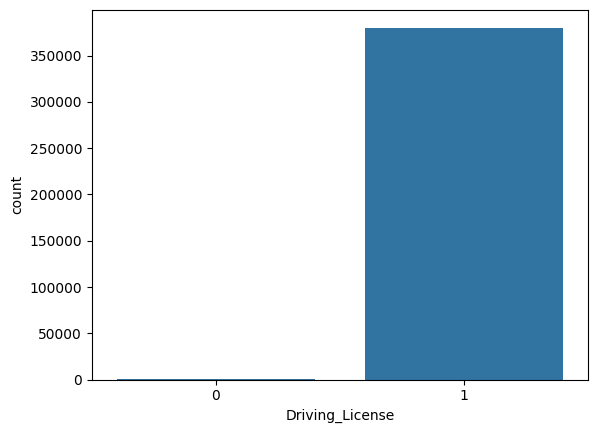

In [18]:
sns.countplot(data=train_data, x="Driving_License")

There is clear imbalance between the class 0 and class 1 for driving license.

In [19]:
train_data["Region_Code"].value_counts()

,count
Region_Code,
28.0,106415
8.0,33877
46.0,19749
41.0,18263
15.0,13308
30.0,12191
29.0,11065
50.0,10243
3.0,9251


<Axes: xlabel='Region_Code', ylabel='Count'>

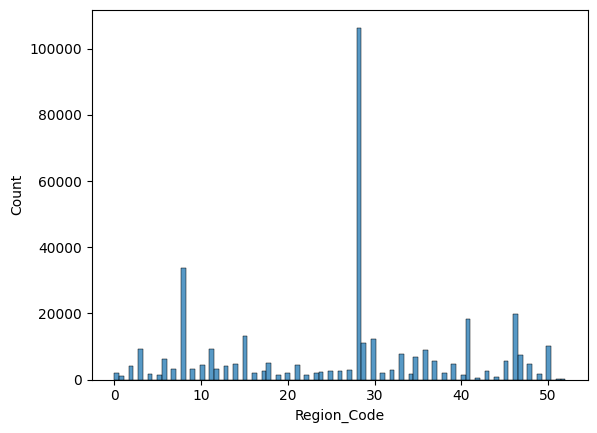

In [20]:
sns.histplot(train_data["Region_Code"])

Previosly Insured Column

In [21]:
train_data['Previously_Insured'].value_counts()

,count
Previously_Insured,
0,206481
1,174628


A little difference between the classes.

In [22]:
# sns.countplot(data=train_data, x="Previously_Insured")

The counts are indicating that the classes are not perfectly balanced but can be called as well balanced.

Vehicle Age column

In [23]:
train_data["Vehicle_Age"].value_counts()

,count
Vehicle_Age,
1-2 Year,200316
< 1 Year,164786
> 2 Years,16007


<Axes: xlabel='Vehicle_Age', ylabel='count'>

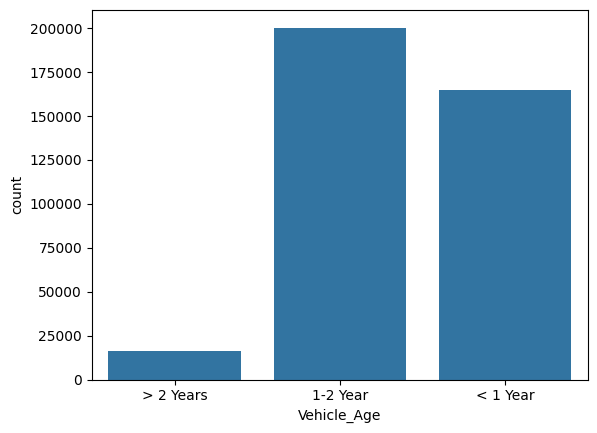

In [24]:
sns.countplot(data=train_data, x="Vehicle_Age")

There is imbalance for the class with greater than 2 years.

In [25]:
train_data["Vehicle_Damage"].value_counts()

,count
Vehicle_Damage,
Yes,192413
No,188696


The data looks like completely balanced.

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

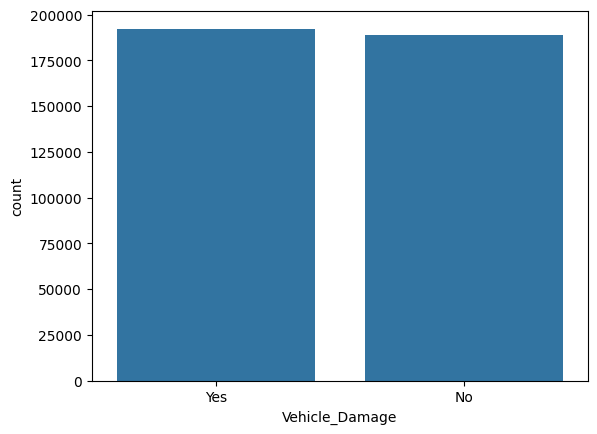

In [26]:
sns.countplot(data=train_data, x="Vehicle_Damage")

The labels appear to be well balanced and there is no imbalance with this feature in the dataset.

Annual Premium feature

In [27]:
train_data['Annual_Premium'].value_counts()

,count
Annual_Premium,
2630.0,64877
69856.0,140
39008.0,41
45179.0,38
38287.0,38
...,...
16081.0,1
109099.0,1
97259.0,1


It is a numerical feature.

<Axes: xlabel='Annual_Premium', ylabel='Count'>

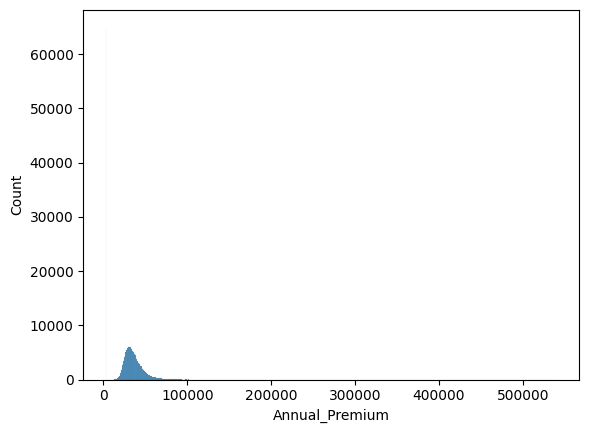

In [28]:
sns.histplot(data=train_data, x='Annual_Premium')

Policy_Sales_Channel feature

In [29]:
train_data["Policy_Sales_Channel"].value_counts()

,count
Policy_Sales_Channel,
152.0,134784
26.0,79700
124.0,73995
160.0,21779
156.0,10661
...,...
149.0,1
43.0,1
144.0,1


<Axes: xlabel='Policy_Sales_Channel', ylabel='Count'>

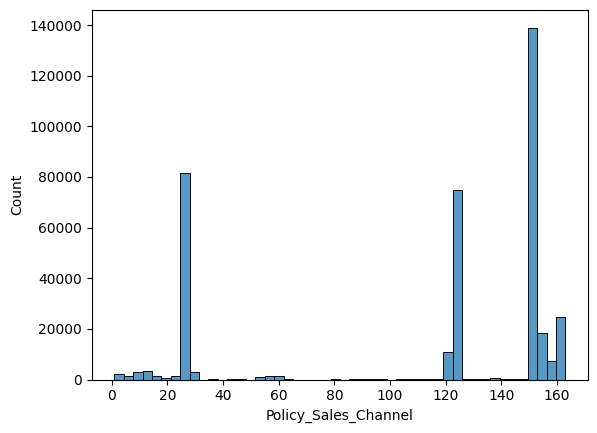

In [30]:
sns.histplot(data=train_data, x="Policy_Sales_Channel")

It does not exihibit any kind of distribution here.

Vintage feature

In [31]:
train_data["Vintage"].value_counts()

,count
Vintage,
256,1418
73,1410
282,1397
158,1394
187,1392
...,...
205,1235
89,1234
32,1230


<Axes: xlabel='Vintage', ylabel='Count'>

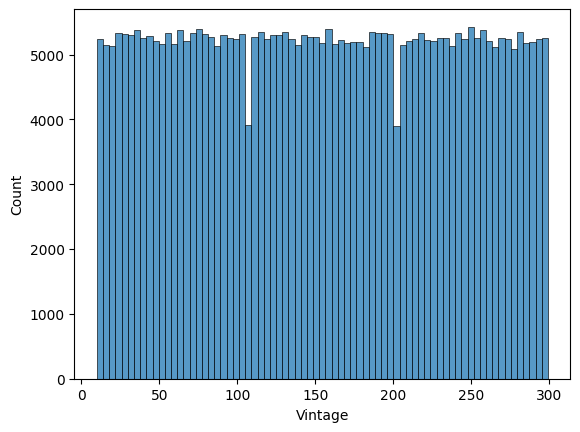

In [32]:
sns.histplot(data=train_data, x="Vintage")

There is no particular distribution for this data.

<Axes: xlabel='Gender', ylabel='count'>

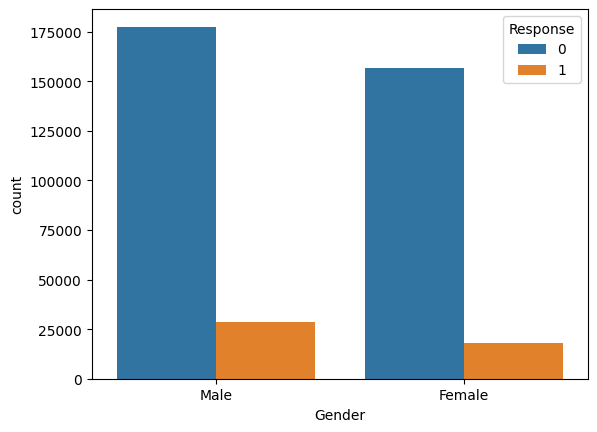

In [33]:
sns.countplot(data = train_data,x="Gender", hue="Response")

There is a clear imbalance with respect to the target variable. We, can clearly observe there are less number of samples for 1 class. Here, as there is a clear imbalance in the target variable we can not clearly judge the relationship with respect to the Gender feature. One thing is, the ratios for the male and female appear to be almost same.

In [34]:
train_data["Driving_License"].value_counts()

,count
Driving_License,
1,380297
0,812


<Axes: xlabel='Driving_License', ylabel='count'>

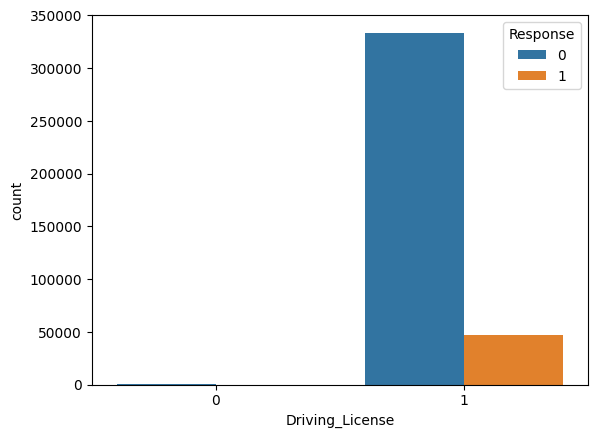

In [35]:
sns.countplot(data = train_data,x="Driving_License", hue="Response")


<Axes: xlabel='Previously_Insured', ylabel='count'>

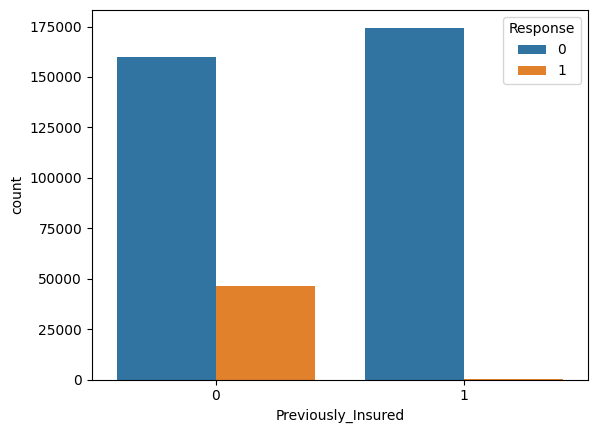

In [36]:
sns.countplot(data = train_data,x="Previously_Insured", hue="Response")


There are more cases with the label 0 and most of the previsly insured people are not interested in taking it again.

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

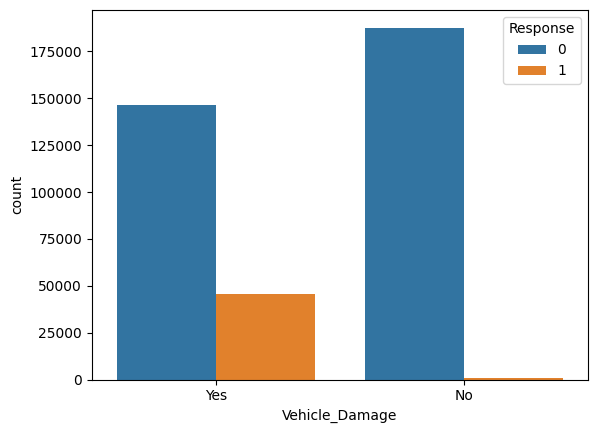

In [37]:
sns.countplot(data = train_data,x="Vehicle_Damage", hue="Response")


People with out any damage are not interested in taking the insurance while there is good count in taking insurance if there is a vehicle damage.

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [39]:
train_data[["Age", "Driving_License", "Previously_Insured", "Vintage", "Response"]].corr()

,Age,Driving_License,Previously_Insured,Vintage,Response
Age,1.000000,-0.079782,-0.254682,-0.001264,0.111147
Driving_License,-0.079782,1.000000,0.014969,-0.000848,0.010155
Previously_Insured,-0.254682,0.014969,1.000000,0.002537,-0.341170
Vintage,-0.001264,-0.000848,0.002537,1.000000,-0.001050
Response,0.111147,0.010155,-0.341170,-0.001050,1.000000


There are not much correlations between the numerical quantites and most of them are falling under the uncorrelated range while Response with previosyl insured is showing a little negative correlation.

<Axes: >

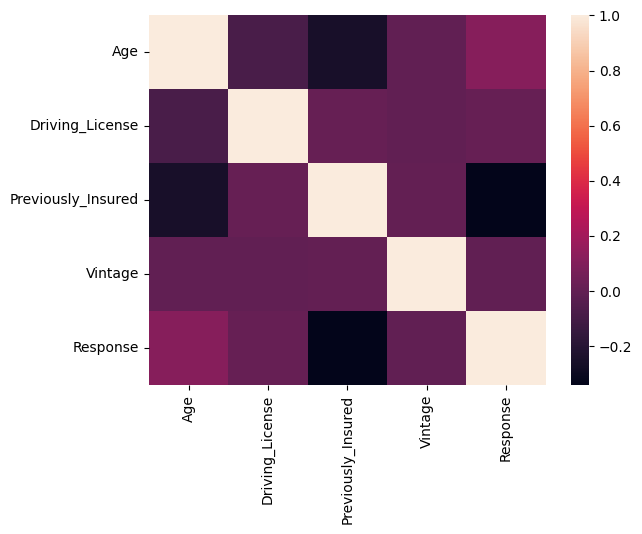

In [40]:
sns.heatmap(train_data[["Age", "Driving_License", "Previously_Insured", "Vintage", "Response"]].corr())

Now let us convert categorical values to numerical values.

In [41]:
# train_data.

In [42]:
train_data["Gender"].value_counts()

,count
Gender,
Male,206089
Female,175020


In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_data["Gender"])
train_data["Gender"] = le.transform(train_data["Gender"])
test_data["Gender"] = le.transform(test_data["Gender"])

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_data["Vehicle_Age"])
train_data["Vehicle_Age"] = le.transform(train_data["Vehicle_Age"])
test_data["Vehicle_Age"] = le.transform(test_data["Vehicle_Age"])


In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_data["Vehicle_Damage"])
train_data["Vehicle_Damage"] = le.transform(train_data["Vehicle_Damage"])
test_data["Vehicle_Damage"] = le.transform(test_data["Vehicle_Damage"])

Splitting the data

In [46]:
xtrain = train_data.drop(["Response"],axis=1)
ytrain = train_data[["Response"]]

In [47]:
ytrain.isnull().sum()

,0
Response,0


In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=0.3, stratify=ytrain, random_state=42)

In [49]:
x_train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
223531,0,46,1,23.0,1,0,0,34564.0,26.0,71
337977,1,51,1,28.0,1,0,0,31982.0,26.0,76
320307,0,40,1,33.0,0,0,0,2630.0,12.0,276
261303,0,28,1,4.0,1,1,0,2630.0,152.0,223
71160,0,21,1,37.0,1,1,0,30939.0,160.0,38
...,...,...,...,...,...,...,...,...,...,...
149107,1,21,1,15.0,0,1,1,48284.0,160.0,70
378816,1,25,1,47.0,1,1,1,23010.0,160.0,58
91744,1,24,1,28.0,0,1,0,59094.0,152.0,62
48700,0,40,1,8.0,1,0,0,28940.0,26.0,262


In [50]:
test_data.drop(["id"],axis=1,inplace=True)


In [51]:
test_data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,25,1,11.0,1,1,0,35786.0,152.0,53
1,1,40,1,28.0,0,0,1,33762.0,7.0,111
2,1,47,1,28.0,0,0,1,40050.0,124.0,199
3,1,24,1,27.0,1,1,1,37356.0,152.0,187
4,1,27,1,28.0,1,1,0,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...
127032,0,26,1,37.0,1,1,0,30867.0,152.0,56
127033,0,38,1,28.0,0,0,1,28700.0,122.0,165
127034,1,21,1,46.0,1,1,0,29802.0,152.0,74
127035,1,71,1,28.0,1,0,0,62875.0,26.0,265


As there is imbalance in the data, decision tree and boosting algorithms might work better than the traditional models.

In [52]:

def model_metrics(model, test_features, test_labels):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score,f1_score,recall_score
    out=model.predict(test_features)
    print("Accuracy : ",accuracy_score(out,test_labels)*100, flush=True)
    print("Precision : ",precision_score(out,test_labels,average = 'weighted')*100, flush=True)
    print("f1_score : ",f1_score(out,test_labels,average = "weighted")*100, flush=True)
    print("recall score : ",recall_score(out,test_labels,average="weighted")*100, flush=True)
    print("---------------------------------------------------------------------------", flush=True)


In [53]:

def logistic_regression_model(train_features, train_labels, test_features, test_labels,input_params={}, cv=5):
    from sklearn.linear_model import LogisticRegression
    # from skopt import BayesSearchCV
    # from skopt.space import Categorical,Real,Integer
    lr_clf = LogisticRegression()
    # if not input_params:
    #     params = {
    #         'solver' : Categorical(['newton-cg','lbfgs', 'liblinear', 'sag', 'saga']), # 'newton' does not support l1
    #         'max_iter' : Integer(900,1000)
    #     }
    # else:
    #     params = input_params
    # bayes_search = BayesSearchCV(lr_clf, params, cv=cv)
    lr_clf.fit(train_features, train_labels)
    print("-----------------------------------------------------------------------------", flush=True)
    print("Logistic Regression", flush=True)
    model_metrics(lr_clf, test_features, test_labels)
    return lr_clf


In [54]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 6.0 MB/s eta 0:00:00


In [ ]:
logistic_regression_model(x_train, y_train, x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-----------------------------------------------------------------------------
Logistic Regression
Accuracy :  87.80266224276177
Precision :  99.99577582351733


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f1_score :  93.50339034488194
recall score :  87.80266224276177
---------------------------------------------------------------------------


LogisticRegression()

In [ ]:

def svc_model(train_features, train_labels, test_features, test_labels, input_params={}, cv=5):
    # from skopt import BayesSearchCV
    # from skopt.space import Categorical,Real,Integer
    from sklearn.svm import SVC
    svc=SVC(probability=True)
    # if not input_params:
    #     params = {
    #     'kernel' : Categorical(['linear','poly','rbf','sigmoid']),
    #     'max_iter' : Integer(50,5000)
    #     }
    # else:
    #     params = input_params
    # bayes_search = BayesSearchCV(svc,params, cv=cv)
    svc.fit(train_features,train_labels)
    print("-----------------------------------------------------------------------------", flush=True)
    print("SVM model", flush=True)
    model_metrics(svc, test_features, test_labels)
    return svc


In [ ]:
svc_model(x_train, y_train, x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-----------------------------------------------------------------------------
SVM model
Accuracy :  87.80463720030019
Precision :  100.0
f1_score :  93.50635693479015
recall score :  87.80463720030019
---------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC(probability=True)

In [ ]:
def random_forest_model(train_features, train_labels, test_features, test_labels, input_params={}, cv=5):
    from sklearn.ensemble import RandomForestClassifier
    # from skopt import BayesSearchCV
    # from skopt.space import Categorical,Real,Integer
    rc = RandomForestClassifier()
    # if not input_params:
    #     params = {
    #     'n_estimators' : Integer(30,150),
    #     'min_samples_leaf' : Integer(4,6),
    #     'criterion' : Categorical(['gini','entropy','log_loss']),
    #     }
    # else:
    #     params = input_params
    # bayes_search = BayesSearchCV(rc,params, cv=cv)
    rc.fit(train_features,train_labels)
    print("-----------------------------------------------------------------------------", flush=True)
    print("Random Forest model", flush=True)
    model_metrics(rc, test_features, test_labels)
    return rc


In [ ]:
random_forest_model(x_train, y_train, x_test, y_test)

<ipython-input-102-bc64800e3d12>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rc.fit(train_features,train_labels)


-----------------------------------------------------------------------------
Random Forest model
Accuracy :  87.0561282932417
Precision :  93.90930065545234
f1_score :  90.02952259310973
recall score :  87.0561282932417
---------------------------------------------------------------------------


RandomForestClassifier()

In [ ]:
def gradient_boosting_model(train_features, train_labels, test_features, test_labels, input_params={}, cv=5):
    from sklearn.ensemble import GradientBoostingClassifier
    # from skopt.space import Integer,Real,Categorical
    # from skopt import BayesSearchCV
    xgtrain=GradientBoostingClassifier()
    # if not input_params:
    #     params= {
    #     'min_samples_leaf' : Integer(2,6),
    #     'max_features' : Categorical(['sqrt','log2',None]),
    # }
    # else:
    #     params = input_params
    # bayes_search= BayesSearchCV(xgtrain, params, cv=cv)
    xgtrain.fit(train_features,train_labels)
    print("-----------------------------------------------------------------------------", flush=True)
    print("Gradient Boosting model", flush=True)
    model_metrics(xgtrain, test_features, test_labels)
    return xgtrain

In [ ]:
gradient_boosting_model(x_train, y_train, x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-----------------------------------------------------------------------------
Gradient Boosting model
Accuracy :  87.81451198799226
Precision :  99.878874384569
f1_score :  93.43369831384575
recall score :  87.81451198799226
---------------------------------------------------------------------------


GradientBoostingClassifier()

In [55]:
!pip install xgboost

In [56]:
import xgboost as xgb
model = xgb.XGBClassifier(
    objective='binary:logistic',  # Specify the objective function
    num_class=1,  # Number of classes in the dataset
    eval_metric='mlogloss',  # Evaluation metric
    num_parallel_tree= 4,
    subsample= 0.5
)

# Train the model
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=1, num_parallel_tree=4, ...)

In [57]:
y_pred = model.predict(x_test)

In [58]:
# Evaluate accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,f1_score,recall_score
out= y_test
test_labels = y_pred
print("Accuracy : ",accuracy_score(out,test_labels)*100, flush=True)
print("Precision : ",precision_score(out,test_labels,average = 'weighted')*100, flush=True)
print("f1_score : ",f1_score(out,test_labels,average = "weighted")*100, flush=True)
print("recall score : ",recall_score(out,test_labels,average="weighted")*100, flush=True)
print("---------------------------------------------------------------------------", flush=True)

Accuracy :  87.68771920617844
Precision :  82.88294981826228
f1_score :  82.6177299310394
recall score :  87.68771920617844
---------------------------------------------------------------------------


In [59]:
!pip install LightGBM

In [60]:
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'bagging_freq': 5,
    'verbose': -1
}


In [65]:
# Convert dataset into LightGBM Dataset format
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)


In [67]:
# Train LightGBM model
import lightgbm as lgb
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],  # Monitoring validation set
    num_boost_round=1000
)


In [74]:
y_pred = model.predict(x_test)
y_pred_class = (y_pred > 0.5).astype(int)

In [75]:
# Evaluate accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,f1_score,recall_score
out= y_test
test_labels = y_pred_class
print("Accuracy : ",accuracy_score(out,test_labels)*100, flush=True)
print("Precision : ",precision_score(out,test_labels,average = 'weighted')*100, flush=True)
print("f1_score : ",f1_score(out,test_labels,average = "weighted")*100, flush=True)
print("recall score : ",recall_score(out,test_labels,average="weighted")*100, flush=True)
print("---------------------------------------------------------------------------", flush=True)

Accuracy :  87.67984746311214
Precision :  82.67691808415249
f1_score :  82.50385140944826
recall score :  87.67984746311214
---------------------------------------------------------------------------
